In [1]:
from pyrvea.Population.Population import Population
from pyrvea.Problem.testProblem import testProblem
from pyrvea.EAs.slowRVEA import slowRVEA
import altair as alt
import pandas as pd
import numpy as np

In [2]:
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
name = "DTLZ3"
k = 10
numobj = 5
numconst = 0
numvar = numobj + k - 1
problem = testProblem(name, numvar, numobj, numconst)

# RVEA with smooth transition of RVs

In [4]:
pop = Population(problem, assign_type="empty")

## Initial Evolution

The first 3000 generations happen with a very small number of reference vectors, focused around the [1, 1, 1...] direction. The number of RVs, and hence the number of solutions and the number of function evaluations per generation is: 2M + 4, where M is the number of objectives.

In [5]:
pop.evolve(slowRVEA, {"generations_per_iteration": 150, "iterations": 20})

Plot saved as:  DTLZ3_5.html
View the plot by opening the file in browser.
To view the plot in Jupyter Notebook, use the IFrame command.


## Interactive Evolution

This phase requires a very small number of generations (200, here). This number can be further reduced with a better iteration policy. The effect of this kind of evolution seems to be a kind of navigation along the pareto front.

In [6]:
pop.evolve(
    slowRVEA,
    {
        "generations_per_iteration": 10,
        "iterations": 20,
        "old_point": [1, 1, 1, 1, 1],
        "ref_point": [1, 1, 0, 0, 0],
    },
)

/home/bhupinder/Projects/pyRVEA/pyrvea/Selection/APD_select.py:48: UserWarning:

RVEA.py line 64 cosine smaller than 0 increased to 0



In [7]:
pop.evolve(
    slowRVEA,
    {
        "generations_per_iteration": 10,
        "iterations": 20,
        "old_point": [1, 1, 0, 0, 0],
        "ref_point": [0, 0, 0, 1, 1],
    },
)

In [8]:
archive_df = pop.archive

In [9]:
objective_norms = archive_df['objective_values'].apply(lambda x: np.linalg.norm(x))
archive_df['objective_norms'] = objective_norms

In [10]:
x = alt.X('generation', scale=alt.Scale(domain=(500,3400)))
y_obj = alt.Y('median(objective_norms)', scale=alt.Scale(type='log',domain=(1,10)))

In [11]:
line = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_obj).properties(title='Median Magnitude of objective vectors')

### The following graph shows the magnitude of the reference vectors with generation count. Note that problem DTLZ3 has a radially symmetrical pareto front, with a radius of 1.

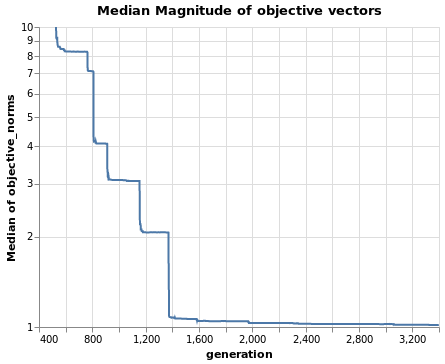

In [12]:
line

In [13]:
angle_dev_from_1 = archive_df['objective_values'].apply(lambda x: np.degrees(np.arccos(np.dot(x,[1,1,0,0,0])/(np.linalg.norm(x)*np.linalg.norm([1,1,0,0,0])))))
angle_dev_from_2 = archive_df['objective_values'].apply(lambda x: np.degrees(np.arccos(np.dot(x,[0,0,0,1,1])/(np.linalg.norm(x)*np.linalg.norm([0,0,0,1,1])))))

In [14]:
archive_df['angle_1'] = angle_dev_from_1
archive_df['angle_2'] = angle_dev_from_2

In [15]:
y_angle_1 = alt.Y('median(angle_1)')
y_angle_2 = alt.Y('median(angle_2)')

### The following graphs show the angular deviation from the Reference Points. RF1 is to be reached at (3000 + 200) generations. RF2 is to be reached at (3000 + 200 + 200) generations.

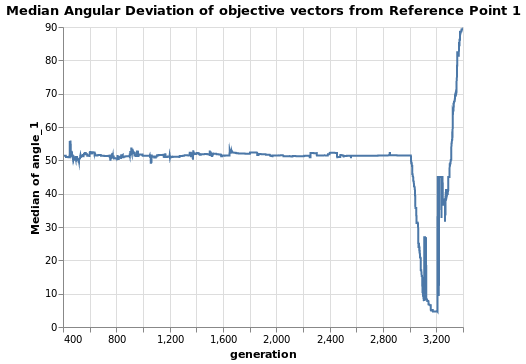

In [16]:
line_angle_1 = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_angle_1).properties(title='Median Angular Deviation of objective vectors from Reference Point 1')
line_angle_1

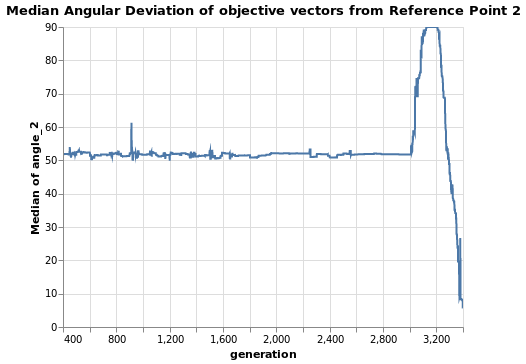

In [17]:
line_angle_2 = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_angle_2).properties(title='Median Angular Deviation of objective vectors from Reference Point 2')
line_angle_2

# Old RVEA

In [18]:
pop = Population(problem, assign_type="empty")
pop.evolve(slowRVEA, {"generations_per_iteration": 150, "iterations": 20})

Plot saved as:  DTLZ3_5.html
View the plot by opening the file in browser.
To view the plot in Jupyter Notebook, use the IFrame command.


In [19]:
pop.evolve(
    slowRVEA,
    {
        "generations_per_iteration": 10,
        "iterations": 20,
        "old_point": [1, 1, 0, 0, 0],
        "ref_point": [1, 1, 0, 0, 0],
    },
)

/home/bhupinder/Projects/pyRVEA/pyrvea/Selection/APD_select.py:48: UserWarning:

RVEA.py line 64 cosine smaller than 0 increased to 0



# NOTE: Evolution with the second RF2 information failed for the normal RVEA.

In [20]:
pop.evolve(
    slowRVEA,
    {
        "generations_per_iteration": 10,
        "iterations": 20,
        "old_point": [0, 0, 0, 1, 1],
        "ref_point": [0, 0, 0, 1, 1],
    },
)

/home/bhupinder/Projects/pyRVEA/pyrvea/OtherTools/ReferenceVectors.py:72: RuntimeWarning:

invalid value encountered in true_divide

/home/bhupinder/Projects/pyRVEA/pyrvea/Selection/APD_select.py:44: RuntimeWarning:

invalid value encountered in greater

/home/bhupinder/Projects/pyRVEA/pyrvea/Selection/APD_select.py:47: RuntimeWarning:

invalid value encountered in less

/home/bhupinder/Projects/pyRVEA/pyrvea/Selection/APD_select.py:74: RuntimeWarning:

All-NaN slice encountered



IndexError: index 0 is out of bounds for axis 0 with size 0

In [21]:
archive_df = pop.archive

objective_norms = archive_df['objective_values'].apply(lambda x: np.linalg.norm(x))
archive_df['objective_norms'] = objective_norms

angle_dev_from_1 = archive_df['objective_values'].apply(lambda x: np.degrees(np.arccos(np.dot(x,[1,1,0,0,0])/(np.linalg.norm(x)*np.linalg.norm([1,1,0,0,0])))))
angle_dev_from_2 = archive_df['objective_values'].apply(lambda x: np.degrees(np.arccos(np.dot(x,[0,0,0,1,1])/(np.linalg.norm(x)*np.linalg.norm([0,0,0,1,1])))))

archive_df['angle_1'] = angle_dev_from_1
archive_df['angle_2'] = angle_dev_from_2

In [22]:
x = alt.X('generation', scale=alt.Scale(domain=(500,3400)))
y_obj = alt.Y('median(objective_norms)', scale=alt.Scale(type='log',domain=(1,10)))

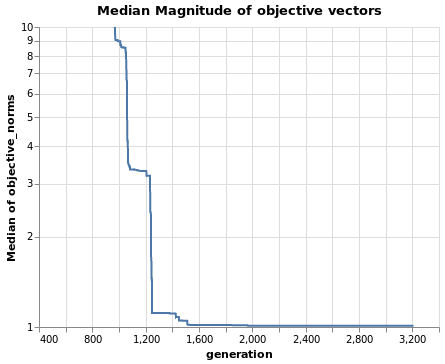

In [23]:
line_old = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_obj).properties(title='Median Magnitude of objective vectors')
line_old

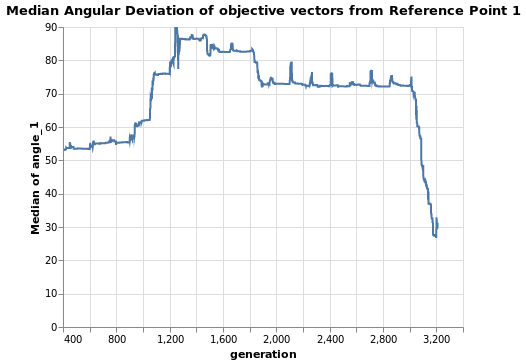

In [24]:
line_angle_1_old = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_angle_1).properties(title='Median Angular Deviation of objective vectors from Reference Point 1')
line_angle_1_old